In [37]:
import pandas as pd
import sympy as sym
import numpy as np
import random 
import statistics as st

dataSet2 = pd.read_csv("CreditCardData.csv")
pd.DataFrame.rename(dataSet2,columns={'default.payment.next.month':'Payment'}, inplace =True)
dataSet2 = dataSet2 .drop(labels= "ID", axis = 1)
dataSet2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [38]:
dataSet2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [39]:
columnsWithOutliers = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for column in dataSet2.columns:
    meanOfCol = st.mean(dataSet2[column])
    StdOfCol = st.stdev(dataSet2[column])
    upperLimit = meanOfCol + 3*StdOfCol
    lowerLimit = meanOfCol - 3*StdOfCol
    dataSet2 = dataSet2[ (dataSet2[column] >= lowerLimit) & (dataSet2[column] <=upperLimit) ]

for column in dataSet2.columns:
     if column not in ['Payment', 'SEX']:
        dataSet2[column] = (dataSet2[column]-st.mean(dataSet2[column]))/(st.stdev(dataSet2[column]))
        df_with_dummies[column] = (df_with_dummies[column]-st.mean(df_with_dummies[column]))/(st.stdev(df_with_dummies[column]))

In [40]:
dataSet2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23249 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    23249 non-null float64
SEX          23249 non-null int64
EDUCATION    23249 non-null float64
MARRIAGE     23249 non-null float64
AGE          23249 non-null float64
PAY_0        23249 non-null float64
PAY_2        23249 non-null float64
PAY_3        23249 non-null float64
PAY_4        23249 non-null float64
PAY_5        23249 non-null float64
PAY_6        23249 non-null float64
BILL_AMT1    23249 non-null float64
BILL_AMT2    23249 non-null float64
BILL_AMT3    23249 non-null float64
BILL_AMT4    23249 non-null float64
BILL_AMT5    23249 non-null float64
BILL_AMT6    23249 non-null float64
PAY_AMT1     23249 non-null float64
PAY_AMT2     23249 non-null float64
PAY_AMT3     23249 non-null float64
PAY_AMT4     23249 non-null float64
PAY_AMT5     23249 non-null float64
PAY_AMT6     23249 non-null float64
Payment      23249 non-null int64
dtypes: float64(22), int64(2)
m

In [41]:
df_with_dummies.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
count,2.324900e+04,23249.000000,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,...,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,2.324900e+04,23249.000000
mean,-1.320291e-16,1.610951,-1.833738e-17,-7.090452e-17,-1.479215e-16,-1.955987e-17,2.200485e-17,-9.779934e-18,1.711488e-17,3.422977e-17,...,1.344741e-17,-2.139360e-17,-6.784829e-17,1.130805e-17,5.012216e-17,-3.422977e-17,-8.557442e-18,-3.667475e-17,-3.911973e-17,0.228053
std,1.000000e+00,0.487545,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.419586
min,-1.161496e+00,1.000000,-2.572119e+00,-2.978195e+00,-1.551080e+00,-1.819682e+00,-1.563276e+00,-1.534729e+00,-1.535204e+00,-1.548997e+00,...,-2.399946e+00,-2.487338e+00,-2.494021e+00,-7.225111e-01,-7.060465e-01,-6.586378e-01,-6.403955e-01,-6.524124e-01,-5.652918e-01,0.000000
25%,-8.175441e-01,1.000000,-1.168876e+00,-1.067966e+00,-7.816509e-01,-8.855116e-01,-7.011508e-01,-6.688973e-01,-6.321586e-01,-6.069485e-01,...,-7.937370e-01,-7.821407e-01,-7.676396e-01,-5.722432e-01,-5.921443e-01,-5.868904e-01,-6.169430e-01,-6.503851e-01,-5.652918e-01,0.000000
50%,-3.016165e-01,2.000000,2.343667e-01,8.422622e-01,-1.221400e-01,4.865934e-02,1.609740e-01,1.969339e-01,2.708863e-01,3.351001e-01,...,-3.478100e-01,-3.660394e-01,-4.025763e-01,-2.477311e-01,-2.627711e-01,-2.838414e-01,-3.452365e-01,-3.436746e-01,-3.276449e-01,0.000000
75%,5.582628e-01,2.000000,2.343667e-01,8.422622e-01,6.472893e-01,4.865934e-02,1.609740e-01,1.969339e-01,2.708863e-01,3.351001e-01,...,4.156492e-01,2.977926e-01,3.056011e-01,1.534579e-01,1.403604e-01,1.184108e-01,1.890242e-01,2.150078e-01,1.305382e-01,0.000000
max,3.481853e+00,2.000000,3.040852e+00,2.752491e+00,3.065496e+00,2.851172e+00,2.747348e+00,2.794427e+00,2.980021e+00,2.219197e+00,...,4.242169e+00,3.895286e+00,3.551436e+00,7.858424e+00,7.701434e+00,7.336157e+00,7.501646e+00,7.198103e+00,8.778032e+00,1.000000


In [32]:
dataSet2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
count,1.168800e+04,11688.000000,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,...,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,11688.000000
mean,-5.349740e-17,-0.037869,-2.431700e-18,9.848385e-17,-3.647550e-18,1.215850e-17,2.188530e-17,-1.215850e-17,-6.687175e-17,-5.106570e-17,...,9.726800e-18,-1.215850e-17,3.890720e-17,-4.498645e-17,1.945360e-17,7.295100e-17,-8.936497e-17,1.179374e-16,1.191533e-16,0.279175
std,1.000000e+00,1.007892,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.448613
min,-1.050891e+00,-1.253117,-2.704882e+00,-2.953424e+00,-1.475192e+00,-1.865545e+00,-1.499946e+00,-1.446652e+00,-1.420955e+00,-1.411615e+00,...,-1.827079e+00,-1.874235e+00,-1.840382e+00,-1.153759e+00,-1.155744e+00,-1.052117e+00,-9.727761e-01,-9.666757e-01,-9.141299e-01,0.000000
25%,-7.392884e-01,-1.253117,-1.272540e+00,-1.060486e+00,-8.463869e-01,-9.631536e-01,-7.028844e-01,-6.482920e-01,-5.877577e-01,-5.407278e-01,...,-8.884273e-01,-8.737592e-01,-8.498426e-01,-1.153759e+00,-1.155744e+00,-1.052117e+00,-9.727761e-01,-9.666757e-01,-9.141299e-01,0.000000
50%,-4.276858e-01,0.797976,1.598027e-01,8.324523e-01,-2.175819e-01,-6.076167e-02,9.417710e-02,1.500682e-01,2.454396e-01,3.301591e-01,...,-3.207014e-01,-3.099196e-01,-3.875249e-01,2.220183e-02,3.686968e-02,1.940223e-02,-1.896967e-01,-2.045519e-01,-2.565242e-01,0.000000
75%,6.109896e-01,0.797976,1.598027e-01,8.324523e-01,7.256256e-01,8.416302e-01,9.417710e-02,1.500682e-01,2.454396e-01,3.301591e-01,...,6.615736e-01,6.074245e-01,5.569709e-01,5.261849e-01,6.847090e-01,6.604389e-01,5.624403e-01,6.069959e-01,5.326606e-01,1.000000
max,2.999943e+00,0.797976,1.592145e+00,2.725390e+00,2.821642e+00,2.646414e+00,2.485362e+00,2.545149e+00,2.745031e+00,2.071933e+00,...,3.226243e+00,3.208370e+00,3.162964e+00,3.314891e+00,3.371770e+00,3.270393e+00,3.410326e+00,3.291391e+00,3.280139e+00,1.000000


In [16]:
corr = dataSet2.corr()
corr.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
LIMIT_BAL,1,0.0504937,-0.248895,-0.112252,0.128026,-0.311905,-0.354677,-0.343966,-0.332113,-0.317959,-0.304541,-0.0193792,-0.0479607,-0.0576121,-0.0502775,-0.0456006,-0.0481307,0.160882,0.162732,0.175715,0.177201,0.179988,0.183009,-0.140043
SEX,0.0504937,1,0.0052397,-0.04182,-0.0852849,-0.0476494,-0.0603069,-0.0580782,-0.0498932,-0.0415099,-0.0328591,-0.0179188,-0.0179187,-0.00819316,0.0019305,0.00694024,0.0102801,0.00696394,0.0215454,0.0345701,0.0225566,0.0166426,0.0291494,-0.036432
EDUCATION,-0.248895,0.0052397,1,-0.159934,0.200497,0.12584,0.1507,0.139841,0.135899,0.123661,0.110928,0.0729609,0.0792208,0.0777235,0.0680665,0.0576364,0.0618635,-0.049878,-0.057476,-0.0508851,-0.0569242,-0.0508886,-0.0459704,0.0410749
MARRIAGE,-0.112252,-0.04182,-0.159934,1,-0.417909,0.0240287,0.0325118,0.0438529,0.0428146,0.0470297,0.047936,0.00316167,0.00787789,0.00888768,0.00848838,0.00866457,0.0086216,0.000688695,-0.0106325,-0.00156135,-0.00105084,-0.00488461,-0.00347226,-0.026678
AGE,0.128026,-0.0852849,0.200497,-0.417909,1,-0.0437945,-0.0562814,-0.0608697,-0.0610289,-0.0704746,-0.0637512,-0.00644953,-0.0109531,-0.0134854,-0.0200446,-0.0227487,-0.0198329,-0.00486956,0.00857953,0.00176341,0.00972532,0.00359985,-0.00245058,0.0172687
PAY_0,-0.311905,-0.0476494,0.12584,0.0240287,-0.0437945,1,0.620931,0.524502,0.496758,0.475987,0.450552,0.246881,0.268975,0.275568,0.282409,0.281664,0.281647,-0.114514,-0.106764,-0.0981608,-0.0816923,-0.0730477,-0.0810143,0.304558
PAY_2,-0.354677,-0.0603069,0.1507,0.0325118,-0.0562814,0.620931,1,0.749044,0.645951,0.615825,0.574797,0.324768,0.343827,0.351775,0.358049,0.354868,0.351254,-0.0888145,-0.0424053,-0.042256,-0.0306856,-0.0184293,-0.0319538,0.235536
PAY_3,-0.343966,-0.0580782,0.139841,0.0438529,-0.0608697,0.524502,0.749044,1,0.756518,0.660298,0.613504,0.298148,0.353162,0.363361,0.373911,0.372358,0.367096,0.0598079,-0.0800035,-0.0353717,-0.0138768,-0.00621506,-0.028248,0.202816
PAY_4,-0.332113,-0.0498932,0.135899,0.0428146,-0.0610289,0.496758,0.645951,0.756518,1,0.793527,0.686361,0.304611,0.355633,0.402211,0.414478,0.413819,0.40881,0.0299353,0.0755669,-0.0558135,-0.00465758,0.0164713,-0.00784837,0.18538
PAY_5,-0.317959,-0.0415099,0.123661,0.0470297,-0.0704746,0.475987,0.615825,0.660298,0.793527,1,0.796806,0.30984,0.359699,0.405047,0.450717,0.454602,0.446943,0.0246353,0.0537742,0.0846019,-0.0238314,0.0308416,0.00806881,0.164371


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, zero_one_loss
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

#inputData = dataSet2.sample(n=25000, random_state=1234)
inputData = dataSet2
yData2 = inputData['Payment']
xData2 = (inputData.loc[:, inputData.columns != 'Payment'])

xTrain2, xTest2, yTrain2, yTest2 = train_test_split(xData2 , yData2, test_size = 0.3, random_state = 1234,shuffle = True)

dataFile = dataSet2.drop(["BILL_AMT3","BILL_AMT5","BILL_AMT5"], axis=1)
yData2Exp = dataFile['Payment']
xData2Exp = (dataFile.loc[:, dataFile.columns != 'Payment'])

xTrain2Exp, xTest2Exp, yTrain2Exp, yTest2Exp = train_test_split(xData2Exp , yData2Exp, test_size = 0.3, random_state = 1234,shuffle = True)


In [41]:
print(cross_val_score(SVC(kernel='linear'),xTrain2,yTrain2,cv=5).mean()*100)
print(cross_val_score(SVC(kernel='poly',degree = 2),xTrain2,yTrain2,cv=5).mean()*100)
print(cross_val_score(SVC(kernel='rbf'),xTrain2,yTrain2,cv=5).mean()*100)

77.52242920682757
78.75752966690175
81.27071301586042


In [7]:

def svmResult(kernelType, xTrainData, yTrainData, xTestData, yTestData, CVal = 1, gammaVal = 0.1, degreeVal = 0):
    if kernelType == 'poly':
        svclassifier = SVC(kernel=kernelType,C=CVal, degree = degreeVal)
    elif kernelType == 'linear':
        svclassifier = SVC(kernel = kernelType,C=CVal)
    else :
        svclassifier = SVC(kernel = kernelType, gamma = gammaVal, C = CVal)
    svclassifier.fit(xTrainData, yTrainData)
    yPred = svclassifier.predict(xTestData)
    error_rate = zero_one_loss(yTestData, yPred,normalize = True)
    print("For "+kernelType+" kernel:")
    print("Error Rate: "+str(error_rate))
    print(confusion_matrix(yPred, yTestData))
    print(classification_report(yPred, yTestData))
    return svclassifier

def learningCurvePlots(kernelType, xTrainData, yTrainData,folds,degreeVal=0):
    
    if kernelType != 'poly':
        svclassifier = SVC(kernel=kernelType)
    else:
        svclassifier = SVC(kernel = kernelType, degree = degreeVal)
    
    trainSizes, trainScores, testScores,fitTimes,_ = learning_curve(estimator = svclassifier, X= xTrainData, y= yTrainData,cv=folds,return_times=True)

    trainScoresMean = np.mean(trainScores, axis=1)
    trainScoresStd = np.std(trainScores, axis=1)
    testScoresMean = np.mean(testScores, axis=1)
    testScoresStd = np.std(testScores, axis=1)
    fitTimesMean= np.mean(fitTimes,axis=1)
    fitTimesStd= np.std(fitTimes,axis=1)

    _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].grid()
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].set_title("Learning Curves("+kernelType+")")
    axes[0].fill_between(trainSizes, trainScoresMean - trainScoresStd,trainScoresMean + trainScoresStd, alpha=0.1, color="r")
    axes[0].fill_between(trainSizes, testScoresMean - testScoresStd,testScoresMean + testScoresStd, alpha=0.1, color="g")
    axes[0].plot(trainSizes, trainScoresMean, 'o-', color="r", label="Training score")
    axes[0].plot(trainSizes, testScoresMean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    axes[1].grid()
    axes[1].set_xlabel("fit_times")
    axes[1].set_ylabel("Score")
    axes[1].set_title("Performance of the model")
    axes[1].fill_between(fitTimesMean, testScoresMean - testScoresStd, testScoresMean + testScoresStd, alpha=0.1)
    axes[1].plot(fitTimesMean,testScoresMean)
    
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\19722\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

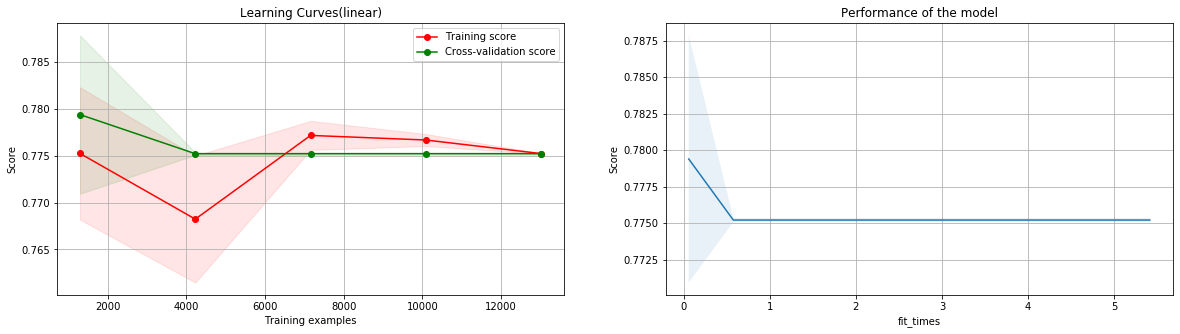

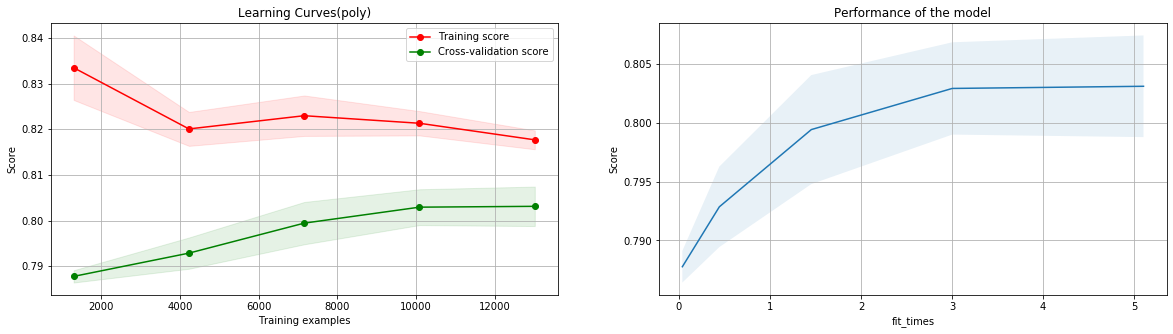

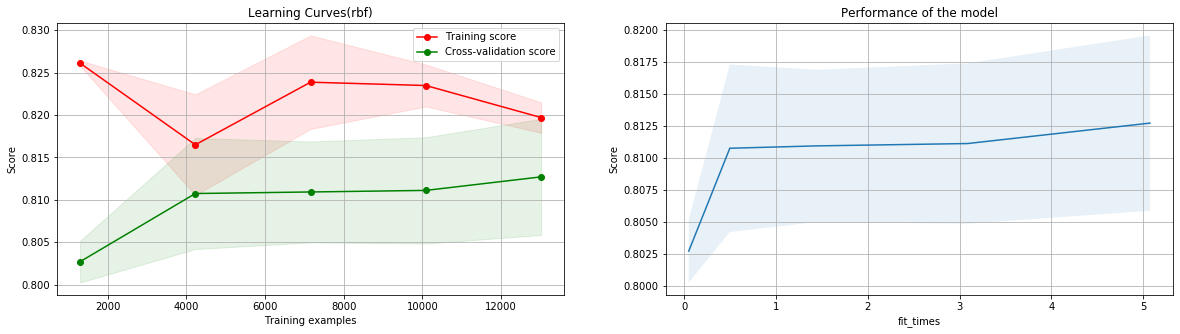

In [43]:
learningCurvePlots('linear', xTrain2, yTrain2, 5)
learningCurvePlots('poly', xTrain2, yTrain2, 5, 3)
learningCurvePlots('rbf', xTrain2, yTrain2, 5)

In [49]:
def lKernelBestParameters(xTrainData,yTrainData):
    lKernelAcc = []
    costRange = np.arange(0.5, 15, 2.5).tolist()
    for cost in costRange:
        linearKernel = SVC(kernel='linear',C=cost)
        lKernelAcc.append((cross_val_score(linearKernel,xTrainData,yTrainData,cv=5).mean())*100)

    plt.plot(costRange, lKernelAcc, 'o-')
    plt.ylabel("Accuracy")
    plt.xlabel("Cost")
    plt.title("Accuracy Vs Cost for Linear kernel")
    plt.xlim(0,15)
    plt.ylim(70,100)


    linearResultData = {"Cost":costRange,"Accuracy": lKernelAcc}
    lKernel = pd.DataFrame(linearResultData)
   # print (lKernel)
    return [plt,lKernel]

def pKernelBestparameters(xTrainData,yTrainData):

    pKernel = pd.DataFrame(columns=['Degree','Cost','Accuracy'])
    degreeValues = [1, 2, 3, 4 ,5]
    costValue= np.arange(0.5, 12, 3).tolist()
    for cost in costValue:
        for polyDegree in degreeValues:
            polyKernel = SVC(kernel='poly',C=cost, degree= polyDegree)
            accuracy = (cross_val_score(polyKernel,xTrainData,yTrainData,cv=5).mean())*100
            pKernel = pKernel.append(dict(zip(pKernel.columns,[polyDegree,cost,accuracy])), ignore_index=True)
        costGroupData = pKernel[pKernel['Cost']==cost]
        plt.plot(costGroupData['Degree'], costGroupData['Accuracy'] , '-o',label=cost)
    plt.ylabel("Accuracy")
    plt.xlabel("Degree Of polynomial")
    plt.title("Accuracy Vs degree of polynomial for polynomial kernel")
    plt.ylim(70,90)
    plt.legend( title="Cost")
  #  print (pKernel)
    return [plt,pKernel]

def rbfKernelBestParameters(xTrainData, yTrainData):
    rbfKernelData = pd.DataFrame(columns=['Gamma','Cost','Accuracy'])
    gammaValues = [0.001, 0.01, 0.1 , 0.5, 1]
    costValues = np.arange(0.5, 12, 3).tolist()
    for costValue in costValues:
        for gammaVal in gammaValues:
            rbfKernel = SVC(kernel = 'rbf', gamma= gammaVal, C= costValue)
            accuracy = (cross_val_score(rbfKernel,xTrainData,yTrainData,cv=5).mean())*100
            rbfKernelData = rbfKernelData.append(dict(zip(rbfKernelData.columns,[gammaVal, costValue, accuracy])), ignore_index=True)
        costGroupData = rbfKernelData[rbfKernelData['Cost']==costValue]
        plt.plot(costGroupData['Gamma'], costGroupData['Accuracy'] , '-o',label=costValue)
    plt.ylabel("Accuracy")
    plt.xlabel("Gamma")
    plt.title("Accuracy Vs Gamma for rbf kernel")
    plt.legend( title="Cost")
    plt.ylim(70,90)
   # print (rbfKernelData)
    return [plt, rbfKernelData]


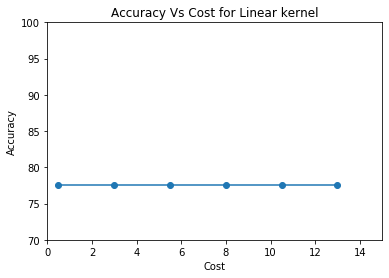

In [45]:
linearResults = lKernelBestParameters(xTrain2,yTrain2)

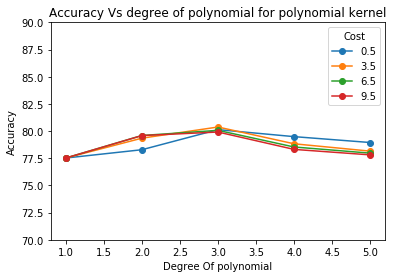

In [50]:
polyResults = pKernelBestparameters(xTrain2, yTrain2)

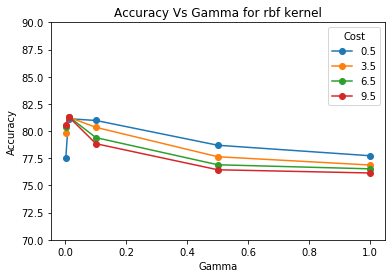

In [51]:
rbfResults = rbfKernelBestParameters(xTrain2, yTrain2)

In [8]:
print("Trian results are: ")
linearModelTrain = svmResult('linear',CVal= 1, 
                        xTrainData= xTrain2,yTrainData = yTrain2, xTestData = xTrain2, yTestData = yTrain2)

Trian results are: 
For linear kernel:
Error Rate: 0.22477571586579825
[[12616  3658]
 [    0     0]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.87     16274
           1       0.00      0.00      0.00         0

    accuracy                           0.78     16274
   macro avg       0.50      0.39      0.44     16274
weighted avg       1.00      0.78      0.87     16274



c:\users\19722\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
linearModelTrain = svmResult('linear',CVal= 1, 
                        xTrainData= xTrain2,yTrainData = yTrain2, xTestData = xTest2, yTestData = yTest2)

For linear kernel:
Error Rate: 0.2356989247311828
[[5331 1644]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.87      6975
           1       0.00      0.00      0.00         0

    accuracy                           0.76      6975
   macro avg       0.50      0.38      0.43      6975
weighted avg       1.00      0.76      0.87      6975



c:\users\19722\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
print("Trian results are: ")
polyModelTrain = svmResult ('poly',CVal= 3.5, degreeVal= 3,
                        xTrainData= xTrain2,yTrainData = yTrain2, xTestData = xTrain2, yTestData = yTrain2)

Trian results are: 
For poly kernel:
Error Rate: 0.17401990905739217
[[12264  2480]
 [  352  1178]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     14744
           1       0.32      0.77      0.45      1530

    accuracy                           0.83     16274
   macro avg       0.65      0.80      0.68     16274
weighted avg       0.91      0.83      0.85     16274



In [11]:
polyModelTrain = svmResult ('poly',CVal= 3.5, degreeVal= 3,
                        xTrainData= xTrain2,yTrainData = yTrain2, xTestData = xTest2, yTestData = yTest2)

For poly kernel:
Error Rate: 0.2008602150537634
[[5117 1187]
 [ 214  457]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      6304
           1       0.28      0.68      0.39       671

    accuracy                           0.80      6975
   macro avg       0.62      0.75      0.64      6975
weighted avg       0.89      0.80      0.83      6975



In [12]:
print("Trian results are: ")
rbfModelTrain = svmResult ('rbf',CVal=0.5 , gammaVal= 0.1, 
                        xTrainData= xTrain2,yTrainData = yTrain2, xTestData = xTrain2, yTestData = yTrain2)

Trian results are: 
For rbf kernel:
Error Rate: 0.1792429642374339
[[12221  2522]
 [  395  1136]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     14743
           1       0.31      0.74      0.44      1531

    accuracy                           0.82     16274
   macro avg       0.64      0.79      0.67     16274
weighted avg       0.91      0.82      0.85     16274



In [15]:
rbfModelTest = svmResult ('rbf',CVal= 0.5, gammaVal= 0.1, 
                        xTrainData= xTrain2, yTrainData = yTrain2, xTestData = xTest2, yTestData = yTest2)

For rbf kernel:
Error Rate: 0.19741935483870965
[[5124 1170]
 [ 207  474]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      6294
           1       0.29      0.70      0.41       681

    accuracy                           0.80      6975
   macro avg       0.62      0.76      0.64      6975
weighted avg       0.90      0.80      0.84      6975



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


def BestDepthForDecisionTree(xTrain, yTrain, depthValues):

    DT_accuracy = []
    depthValues = np.arange(1,20).tolist()
    DT_clf = DecisionTreeClassifier(random_state=123)
    for depth in depthValues:
        DT_accuracy.append(cross_val_score(DecisionTreeClassifier(random_state=123,max_depth = depth),xTrain,yTrain,cv=5).mean()*100)

    return DT_accuracy

def DecisionTreeResutls(xTrain, yTrain, xTest, yTest , depth = None, features = None, criterion = 'gini', alphaVal = 0):
    DT_clf = tree.DecisionTreeClassifier(max_depth=depth, max_features= features , random_state=123, criterion= criterion, ccp_alpha= alphaVal)
    DT_clf = DT_clf.fit(xTrain, yTrain)

    y_pred = DT_clf.predict(xTest)
    error_rate = zero_one_loss(yTest, y_pred,normalize = True)
    print("Error rate is : "+str(error_rate))
    print(confusion_matrix(yTest,y_pred))
    print(classification_report(yTest,y_pred))
    
    return DT_clf

Text(0, 0.5, 'Accuracy')

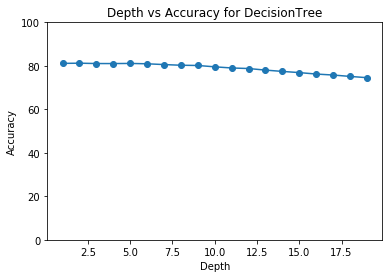

In [51]:
depthValues = np.arange(1,20).tolist()
accuracy = BestDepthForDecisionTree(xData2, yData2,depthValues)
plt.plot( depthValues, accuracy,'-o')
plt.ylim(0,100)
plt.title("Depth vs Accuracy for DecisionTree")
plt.xlabel("Depth")
plt.ylabel("Accuracy")

In [52]:
for value in range(1, 10,2):
    print (value)
    DecisionTreeResutls(xTrain2, yTrain2, xTest2, yTest2, depth = value )

1
Error rate is : 0.19326164874551977
[[5127  204]
 [1144  500]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5331
           1       0.71      0.30      0.43      1644

    accuracy                           0.81      6975
   macro avg       0.76      0.63      0.65      6975
weighted avg       0.79      0.81      0.78      6975

3
Error rate is : 0.1941218637992832
[[5133  198]
 [1156  488]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5331
           1       0.71      0.30      0.42      1644

    accuracy                           0.81      6975
   macro avg       0.76      0.63      0.65      6975
weighted avg       0.79      0.81      0.77      6975

5
Error rate is : 0.19584229390681007
[[5135  196]
 [1170  474]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5331
           1       0.71      0.29      0.41

In [53]:
for i in range(1, 10, 2):
    print (i)
    DecisionTreeResutls(xTrain2, yTrain2, xTest2, yTest2, depth = 5, features = i )


1
Error rate is : 0.21878136200716847
[[5246   85]
 [1441  203]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      5331
           1       0.70      0.12      0.21      1644

    accuracy                           0.78      6975
   macro avg       0.74      0.55      0.54      6975
weighted avg       0.77      0.78      0.72      6975

3
Error rate is : 0.199426523297491
[[5097  234]
 [1157  487]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5331
           1       0.68      0.30      0.41      1644

    accuracy                           0.80      6975
   macro avg       0.75      0.63      0.65      6975
weighted avg       0.78      0.80      0.77      6975

5
Error rate is : 0.20530465949820786
[[5153  178]
 [1254  390]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5331
           1       0.69      0.24      0.35 

In [54]:
print ("Train results: ")
DecisionTreeResutls(xTrain2, yTrain2, xTrain2, yTrain2, depth = 5, features =7 , alphaVal = 0 )
print ("Test results: ")
DecisionTreeResutls(xTrain2, yTrain2, xTest2, yTest2, depth = 5, features = 7 , alphaVal = 0)


Train results: 
Error rate is : 0.18440457170947522
[[12160   456]
 [ 2545  1113]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     12616
           1       0.71      0.30      0.43      3658

    accuracy                           0.82     16274
   macro avg       0.77      0.63      0.66     16274
weighted avg       0.80      0.82      0.79     16274

Test results: 
Error rate is : 0.1981362007168459
[[5109  222]
 [1160  484]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5331
           1       0.69      0.29      0.41      1644

    accuracy                           0.80      6975
   macro avg       0.75      0.63      0.65      6975
weighted avg       0.78      0.80      0.77      6975



DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [55]:
DecisionTreeResutls(xTrain2, yTrain2, xTest2, yTest2, depth = 5, features = 7 ,alphaVal = 0)
DecisionTreeResutls(xTrain2, yTrain2, xTest2, yTest2, depth = 5, features = 7 ,alphaVal = 0, criterion='entropy')

Error rate is : 0.1981362007168459
[[5109  222]
 [1160  484]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5331
           1       0.69      0.29      0.41      1644

    accuracy                           0.80      6975
   macro avg       0.75      0.63      0.65      6975
weighted avg       0.78      0.80      0.77      6975

Error rate is : 0.19741935483870965
[[5099  232]
 [1145  499]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5331
           1       0.68      0.30      0.42      1644

    accuracy                           0.80      6975
   macro avg       0.75      0.63      0.65      6975
weighted avg       0.79      0.80      0.77      6975



DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

Text(0, 0.5, 'Accuracy')

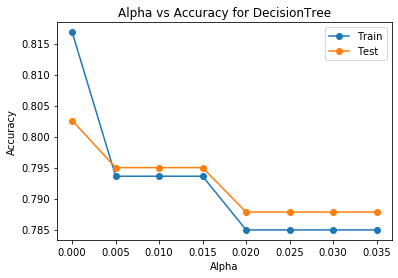

In [56]:
DT_train_accuracy = []
DT_test_accuracy = []

alphaList = np.arange(0, 0.04, 0.005).tolist()
for value in alphaList:
    DT_clf = tree.DecisionTreeClassifier(max_depth=5, max_features= 7 , random_state=123,ccp_alpha= value,criterion='entropy')
    DT_clf = DT_clf.fit(xTrain2, yTrain2)
    DT_train_accuracy.append(DT_clf.score(xTrain2, yTrain2))
    DT_test_accuracy.append(DT_clf.score(xTest2, yTest2))
    
plt.plot( alphaList, DT_train_accuracy,'-o',label='Train')
plt.plot( alphaList, DT_test_accuracy, '-o', label= 'Test')
plt.legend()
plt.title("Alpha vs Accuracy for DecisionTree")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

In [58]:
DecisionTreeResutls(xTrain2, yTrain2, xTest2, yTest2, depth = 5, features = 7 ,alphaVal = 0,criterion='entropy')

Error rate is : 0.19741935483870965
[[5099  232]
 [1145  499]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5331
           1       0.68      0.30      0.42      1644

    accuracy                           0.80      6975
   macro avg       0.75      0.63      0.65      6975
weighted avg       0.79      0.80      0.77      6975



DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [62]:
def AdaBoostingBestLRate(lRateValues, xTrain, yTrain, estimators=100, randomState = 123):
    boostingAccuracy = []
    for lRate in lRateValues:
        B_clf = AdaBoostClassifier(n_estimators=estimators, random_state= randomState,learning_rate=lRate)
        boostingAccuracy.append(cross_val_score(B_clf, xTrain, yTrain, cv= 5).mean()*100)
    return boostingAccuracy

def AdaBoostingEstimators(estimatorValues, xTrain, yTrain, lRate = 0.1, randomState =123):
    boostingAccuracy2 = []
    for estimator in estimatorValues:
        B_clf = AdaBoostClassifier(n_estimators=estimator, random_state= 123,learning_rate=lRate)
        boostingAccuracy2.append(cross_val_score(B_clf, xTrain, yTrain, cv= 5).mean()*100)  
    return boostingAccuracy2

def AdaBoostingResults(xTrain, yTrain, xTest, yTest , noOfEstimators, lRate):
    B_clf = AdaBoostClassifier(n_estimators=noOfEstimators, random_state= 123,learning_rate=lRate)
    B_clf = B_clf.fit(xTrain, yTrain)

    y_pred = B_clf.predict(xTest)
    error_rate = zero_one_loss(yTest, y_pred,normalize = True)
    print("Error rate is : "+ str(error_rate))
    print(confusion_matrix(yTest,y_pred))
    print(classification_report(yTest,y_pred))
    
    return B_clf

In [60]:
from sklearn.ensemble import AdaBoostClassifier
lRateValues = [0.1, 0.3, 0.5, 0.7, 1.0]
boostingAccuracy = AdaBoostingBestLRate(lRateValues, xTrain2, yTrain2)


Text(0, 0.5, 'Accuracy')

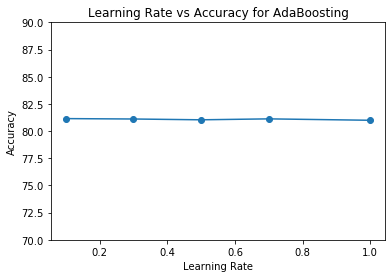

In [61]:
plt.plot( lRateValues, boostingAccuracy,'-o')
plt.ylim(70, 90)
plt.title("Learning Rate vs Accuracy for AdaBoosting")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
  

In [63]:
estimatorValues = [10, 20, 30, 50, 100]
accuracywithEstimators = AdaBoostingEstimators(estimatorValues, xTrain2, yTrain2)

Text(0, 0.5, 'Accuracy')

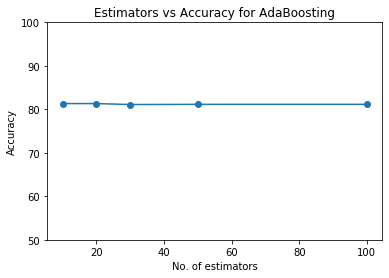

In [64]:
plt.plot(estimatorValues, accuracywithEstimators,'-o')
plt.ylim(50, 100)
plt.title("Estimators vs Accuracy for AdaBoosting")
plt.xlabel("No. of estimators")
plt.ylabel("Accuracy")

In [66]:
AdaBoostingResults(xTrain2,yTrain2,xTest2,yTest2,noOfEstimators=100,lRate= 0.1)

Error rate is : 0.1941218637992832
[[5120  211]
 [1143  501]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5331
           1       0.70      0.30      0.43      1644

    accuracy                           0.81      6975
   macro avg       0.76      0.63      0.65      6975
weighted avg       0.79      0.81      0.78      6975



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=123)

In [72]:
def bestModelFit(depthValues, xTrain, yTrain):
    boostingAccuracy3 = []
    for depth in depthValues:
        clfTest = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = depth, max_features= 9,criterion='entropy'), learning_rate=0.3, n_estimators=50, random_state=123)
        boostingAccuracy3.append(cross_val_score(clfTest, xTrain, yTrain, cv= 5).mean()*100)  
    return boostingAccuracy3

In [78]:
depthFormodel = [3,4,5,6,7]
boostingAccuracy3 = bestModelFit(depthFormodel,xTrain2,yTrain2)


Text(0, 0.5, 'Accuracy')

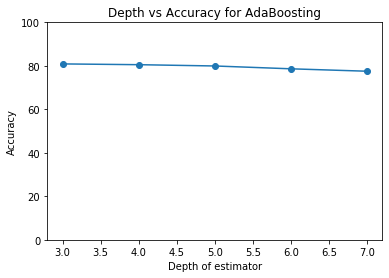

In [79]:
plt.plot(depthFormodel, boostingAccuracy3,'-o')
plt.ylim(0, 100)
plt.title("Depth vs Accuracy for AdaBoosting")
plt.xlabel("Depth of estimator")
plt.ylabel("Accuracy")

In [82]:
BoostingClassifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 4, max_features= 9,criterion='entropy'), learning_rate=0.3, n_estimators=50, random_state=123)
BoostingClassifier.fit(xTrain2, yTrain2)
yPred = BoostingClassifier.predict(xTest2)
error_rate = zero_one_loss(yTest2, yPred,normalize = True)
print("Error Rate: "+str(error_rate))
print(confusion_matrix(yPred, yTest2))
print(classification_report(yPred, yTest2))

Error Rate: 0.1981362007168459
[[5045 1096]
 [ 286  548]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6141
           1       0.33      0.66      0.44       834

    accuracy                           0.80      6975
   macro avg       0.64      0.74      0.66      6975
weighted avg       0.87      0.80      0.83      6975

